# PPAC Analysis Notebook

This notebook demonstrates how to load and visualise the pickle files produced by `build_correlations.py`. The notebook assumes the pickles are stored in the `analysis_output` folder.

In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load Data

In [8]:
data_paths = {
    "coincident": Path("analysis_output/coincident_imp.pkl"),
    "decay_candidates": Path("analysis_output/decay_candidates.pkl"),
    "final_correlated": Path("analysis_output/final_correlated.pkl"),
}
data = {}
for name, path in data_paths.items():
    if path.exists():
        data[name] = pd.read_pickle(path)
        print(f"Loaded {name}: {len(data[name])} rows")
    else:
        print(f"File {path} not found")

Loaded coincident: 74130 rows
Loaded decay_candidates: 11252 rows
Loaded final_correlated: 9 rows


## Basic Inspection

In [9]:
for name, df in data.items():
    display(df.head())

,imp_timetag,imp_x,imp_y,imp_tagx,imp_tagy,imp_nfile,imp_tdelta,imp_nX,imp_nY,imp_xE,...,dt_anodeH_ps,dt_cathode_ns,dt_anodeV_ns,dt_anodeH_ns,dt_cathode_us,dt_anodeV_us,dt_anodeH_us,dt_anodeH_us_corr,dt_anodeV_us_corr,dt_cathode_us_corr
0,101288283747,136,46,101288283747,101288174743,0,109004.0,1,1,1095.016357,...,-1509973,-1504.195,-1513.629,-1509.973,-1.504195,-1.513629,-1.509973,-1.509973,-1.513629,-1.504195
1,400865502745,39,50,400865502745,400865446996,0,55749.0,1,1,1059.421387,...,-1463306,-1456.144,-1461.025,-1463.306,-1.456144,-1.461025,-1.463306,-1.463306,-1.461025,-1.456144
2,573817930247,118,15,573817930247,573817837118,0,93129.0,1,1,1461.149048,...,-1529079,-1523.158,-1529.287,-1529.079,-1.523158,-1.529287,-1.529079,-1.529079,-1.529287,-1.523158
3,1067899768495,70,5,1067899768495,1067899744007,0,24488.0,1,1,694.938171,...,-1515127,-1507.738,-1514.752,-1515.127,-1.507738,-1.514752,-1.515127,-1.515127,-1.514752,-1.507738
4,1323801357064,116,38,1323801357064,1323801252547,0,104517.0,1,1,27699.201172,...,-1452539,-1447.663,-1453.996,-1452.539,-1.447663,-1.453996,-1.452539,-1.452539,-1.453996,-1.447663


,t,x,y,tagx,tagy,nfile,xboard,yboard,tdelta,nX,nY,xE,yE,event_type,recoil_index,recoil_time_sec,ppac_flag,is_clean,log_dt
0,12.745654,116,38,12745654242999,12745654131995,0,1,7,111004.0,1,1,464.951569,456.632172,imp,4,1.323801,both,False,2.435528
1,16.457094,51,16,16457094180996,16457094035992,0,4,7,145004.0,1,1,349.606598,349.284485,imp,6,1.629444,both,False,2.696494
2,8.701934,50,8,8701933921999,8701933896002,0,5,7,25997.0,1,1,339.895233,379.164886,imp,18,2.312056,both,False,1.854715
3,11.881398,150,40,11881397706994,11881397608997,0,1,7,97997.0,1,1,347.061829,379.609589,imp,20,2.952890,both,False,2.189249
4,8.553107,114,5,8553107104005,8553106971995,0,3,6,132010.0,1,1,361.604065,388.738892,imp,33,5.164285,both,False,1.220482


,recoil_x,recoil_y,recoil_xE,timetag,recoil_t,electron_x,electron_y,electron_t,electron_xE,electron_dt,alpha_x,alpha_y,alpha_t,alpha_xE,alpha_dt,chain
0,50.0,48.0,5490.928711,1.545785e+15,1545.785115,50.0,48.0,1547.910783,603.144104,2.125668,50.0,48.0,1549.641867,8205.927734,1.731084,REA
1,66.0,50.0,6865.623047,2.056732e+15,2056.731648,66.0,50.0,2057.004210,382.812195,0.272561,66.0,50.0,2060.357126,8262.849609,3.352916,REA
2,95.0,48.0,6631.552246,2.168259e+15,2168.258740,95.0,48.0,2170.378424,379.965820,2.119685,95.0,48.0,2171.307092,8262.400391,0.928668,REA
3,131.0,35.0,4857.732910,5.162223e+15,5162.222742,131.0,35.0,5166.177670,407.361664,3.954928,131.0,35.0,5167.089910,8282.479492,0.912240,REA
4,53.0,15.0,7033.510742,5.363413e+15,5363.413231,53.0,15.0,5363.824058,290.991974,0.410828,53.0,15.0,5367.426728,8273.238281,3.602669,REA


## Plots
Plot a histogram of recoil energies from the coincident events.

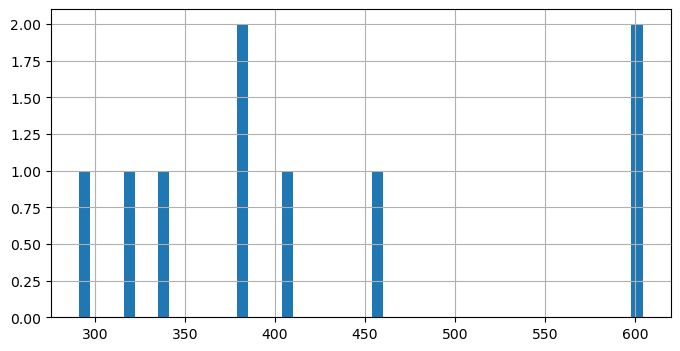

In [11]:
if "final_correlated" in data:
    data["final_correlated"]["electron_xE"].hist(bins=50, figsize=(8,4))
    plt.show()
    plt.close()